# The Things I use SSH for

When I started living in the terminal, eventually I had to learn about all of the usual suspects. [Vim](https://www.vim.org/), [SSH](https://www.openssh.com/), [Midnight Commander](https://midnight-commander.org/), [Lynx](https://lynx.browser.org/), [Tmux](https://github.com/tmux/tmux/wiki), [Mutt](http://www.mutt.org/), and the list would go on if I had the patience.

Eventually I've precipitated to a middle path. Vim, tmux, [terminator](https://code.google.com/archive/p/jessies/wikis/Terminator.wiki), firefox-nightly on [Xmonad](https://xmonad.org/) on ubuntu.

I've noticed over time that in my usage of computers, SSH has become this incredibly flexible tool that just lets me do an amazing variety of things. This post is about listing some of those.



## Setup

SSH stands for Secure Shell. Most linux distributions come with OpenSSH installed. So how do you get started with it? You'll need:

1. Machine A (laptop / desktop / AWS instance)
2. Machine B (laptop / desktop / AWS instance)
3. A network (both machines on the same router / both machines connected to internet with one having  a public IP)
4. SSH installed on both machines

For this post I'll be using two laptops connected to the same router.

To start let's say our machines are set up with Ubuntu installed on them and having these properties:


xxxx | Machine A     | Machine B
-----|---------------|---------------
IP   | 192.168.10.1  | 192.168.10.2
user account | arjoonnA      | arjoonnB
machine name | nitro         | x230

Your details might differ according to your setup.

If you're ever stuck, you can type in `man ssh` to get more details about how to use SSH.


## Connect from machine A to B

```
arjoonnA@nitro:~$ ssh arjoonnB@192.168.10.2
arjoonnB@x230's password:
arjoonnB@x230:~$ 

```

That's it. You can see the prompt change. If you issue a few `ls` and `cd` commands you will see that you are actually in the other machine.

There are a lot of fun things you can do with this alone:

- play music in another computer lab
- quickly see what another person is workin on. (ssh then vim to see the file)
- shut down machines remotely (switching off a whole lab suddenly becomes easier)

## Bypass firewalls (like the ones they put in college)

College used to have firewalls in the wrong places. Research papers out of reach, lectures blocked, torrent trackers blocked (sometimes even https://academictorrents.com/). I ended up using SSH to get out of those situations.

1. Get a machine that is not blocked
    - perhaps this is a machine at home with a good internet connection
    - [AWS offers free machines for a year](https://aws.amazon.com/ec2/?did=ft_card&trk=ft_card)
    - Google / Microsoft Azure etc should all offer one
    - In fact if you know about some unrestricted machine in your college itself, that also works
2. SSH into that machine
3. Tell your browser (I hope it's Firefox! Support freedom!) to use the ssh connection as a proxy

Right. Let's do it. I'll be using a free AWS machine. There are a lot of tutorials on how to get one of those so I'll not be wasting time on that.


```
arjoonnA@nitro:~$ ssh -D 9999 ubuntu@free.aws.machine
ubuntu@ip-172-31-21-122:~$ 
```

The SSH connection is established. Awesome! If you don't want to have a prompt sitting around you can do `arjoonnA@nitro:~$ ssh -D 9999 -N ubuntu@free.aws.machine` instead and the command will simply do nothing after establishing the ssh connection.

Now, all that's left is to tell my browser to use this connection. Let's google and see what my IP is right now.

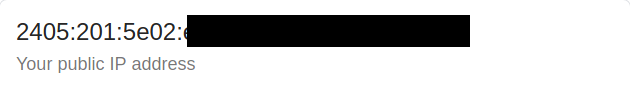

Now I tell firefox to use the SSH connection as a proxy. There are plenty of tutorials on [how to do this](https://www.howtogeek.com/293213/how-to-configure-a-proxy-server-in-firefox/). Here's what my screen looks like right now.

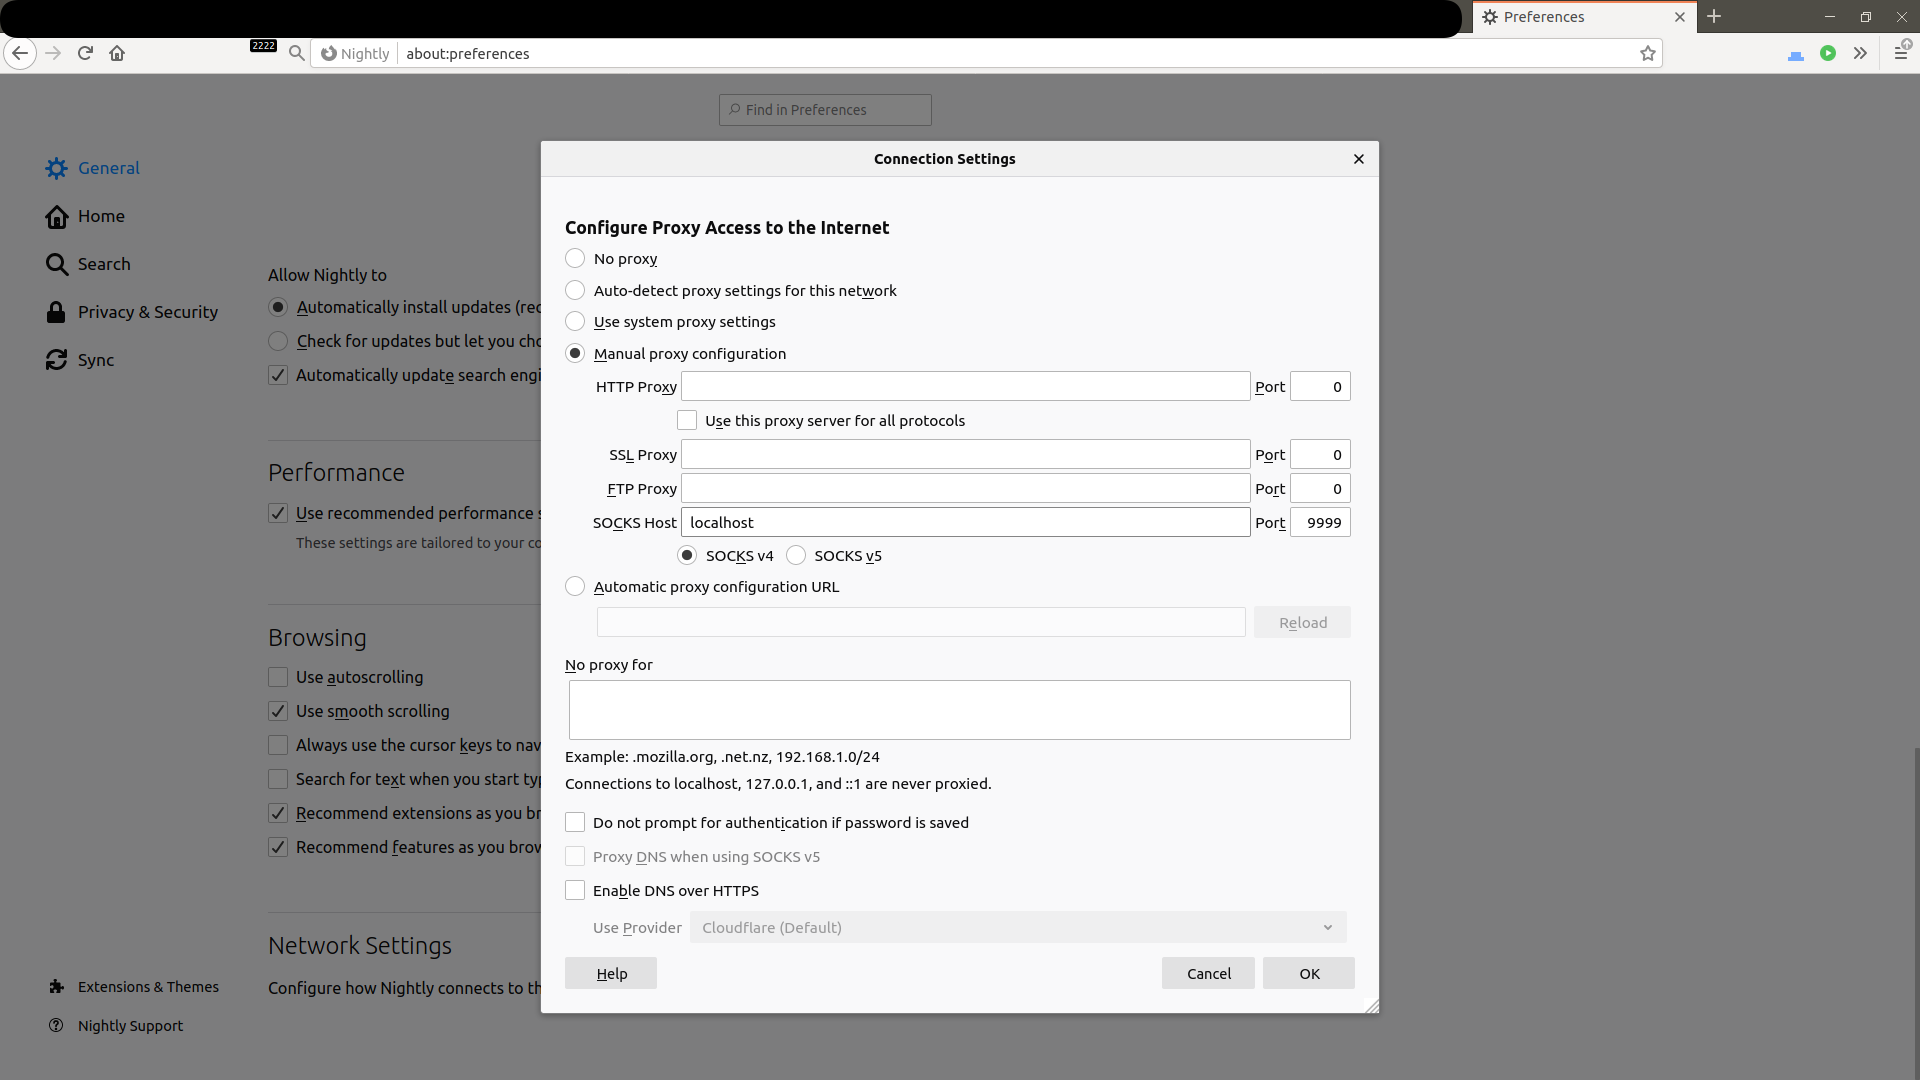

I save and then open a new tab. I'll google for my ip address again and this is what I get

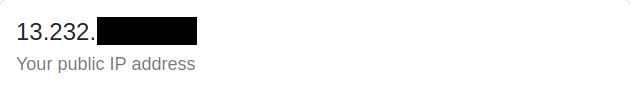


My IP has changed to Machine B that I obtained from AWS for free.

Anything that I do in my browser now is sent via the SSH connection to machine B and then to the internet from there. We have essentially created a "tunnel" beneath the "firewall".

## Accessing programs running on other machines

Sometimes you have a database / microservice / something else running on another machine. It is a pain to access it from another city without introducing a security nightmare!

A common scene these days is to run [JuPyTeR](https://jupyter.org/) on a machine with very expensive hardware and then access it at home via your laptop + mobile internet.

The way I access those things is to run them on "Machine B localhost" and then use ssh to access it at "Machine A localhost".

To establish the connection just like last time we can run `ssh -N -L 8888:localhost:8888 arjoonnB@x230` which will just stay silent. Then when we visit <http://localhost:8888> in our browser, we can see the jupyter system running there.

You can access lots of stuff like this:

- databases in other colleges/universities
- Jupyter on GPU enabled college machines
- web services running in other organizations

## Sending your service to another machine

Ever created a web server and wanted to show it to someone else? Of course. I used to use [ngrok](https://jupyter.org/) for this but they seem to have rate limits (they should since it's free).

Now I use SSH. Let's say you want to show someone your movie collection. Here's one way to do it.

1. Start a simple web server on localhost:8888 with 
   ```
   cd ~/my/movie/collectino
   python -m http.server  8888
   ```
2. SSH into the machine you want someone to be able to access your files
   ```
   ssh -N -R 8888:localhost:8888 arjoonnB@x230
   ```
   
Now, in the x230 machine, I can go to http://localhost:8888 and see the web server you just ran. This becomes more powerful when you have a domain name like `arjoonn.com` which points to an AWS machine. Then, the server you run locally can actually be displayed to anyone in the world, simply by telling them to go to https://www.arjoonn.com (your URL would be different of course).



## Accessing your machine from anywhere in the world

Here's the icing on the cake! Let's say you have two machines A, B. Both of them do not have permanent IP addresses (for example two laptops connecting to the internet via free airport/railwaystation/CCD wifi.

Accessing Machine B from A would be straightforward normally. We could just do `ssh arjoonnB@x230` and be done with it. But the problem here is that the `x230` part is not constant and sometimes not allowed too (firewalls would block incoming connections).

Here what we can do is (observe the command prompt to see what machine is being used)

1. obtain a third machine (again AWS free) called machine C.
2. `arjoonnB@x230:~$ ssh -R 22222:localhost:22 arjoonnC@free.aws.machine`
3. `arjoonnA@nitro:~$ ssh arjoonnC@free.aws.machine`
4. `arjoonnC@free.aws.machine:~$ ssh -p 22222 arjoonnB@localhost`

These 4 steps let us connect to any machine anywhere on the planet as long as they can SSH. This [reverse SSH tunneling](https://unix.stackexchange.com/questions/46235/how-does-reverse-ssh-tunneling-work) is actually pretty useful. For example:

- access home desktop from your laptop
- access GPU machine in college from phone
- access another friend's laptop to help them debug things (especially when coupled with tmux or [wemux](https://github.com/zolrath/wemux))

That wraps up what I wanted to say about SSH. It's a nice tool and makes my life a lot easier.